In [54]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [55]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [56]:
plt.figure(figsize=(14,7))

colormap = np.array(['red', 'orange', 'yellow'])

<Figure size 1400x700 with 0 Axes>

Text(0, 0.5, 'Petal Width')

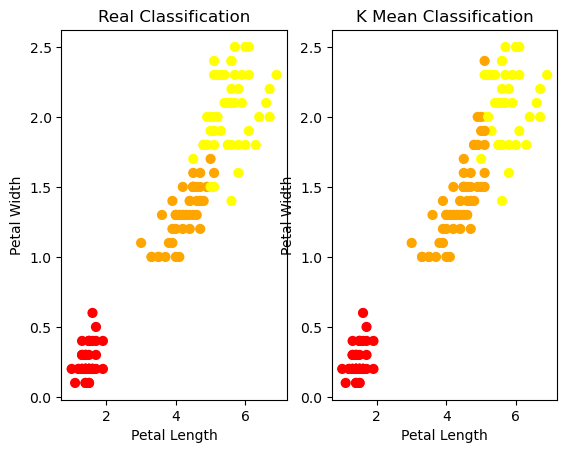

In [57]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

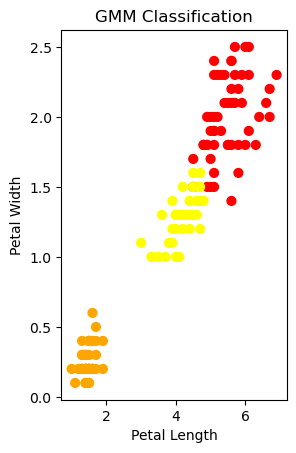

In [58]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm = gmm.predict(xs)
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [59]:
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_)*100)
c1=sm.confusion_matrix(y, model.labels_)
print('The Confusion matrixof K-Mean: \n',c1)

The accuracy score of K-Mean:  89.33333333333333
The Confusion matrixof K-Mean: 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [60]:
print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm)*100)
c2=sm.confusion_matrix(y, y_gmm)
print('The Confusion matrix of EM: \n',c2)

The accuracy score of EM:  0.0
The Confusion matrix of EM: 
 [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


Text(0.5, 1.0, 'Confusion Matrix')

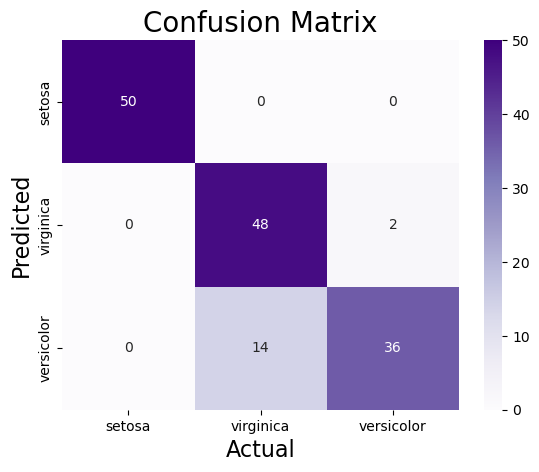

In [64]:
sns.heatmap(c1,annot=True,fmt='g',cmap='Purples',
            xticklabels=['setosa','virginica','versicolor'],yticklabels=['setosa','virginica','versicolor'])
plt.xlabel('Actual',fontsize=16)
plt.ylabel('Predicted',fontsize=16)
plt.title("Confusion Matrix",fontsize=20)

Text(0.5, 1.0, 'Confusion Matrix')

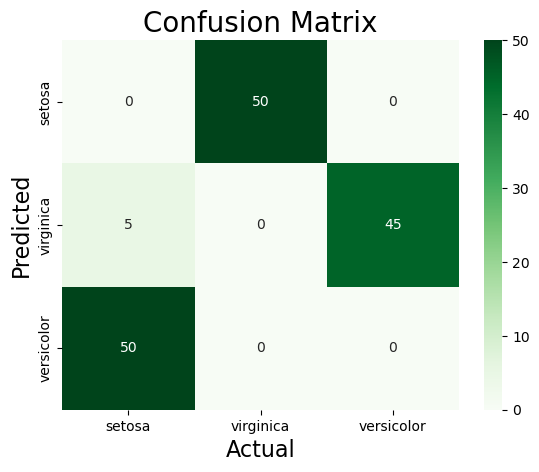

In [65]:
sns.heatmap(c2,annot=True,fmt='g',cmap='Greens',
            xticklabels=['setosa','virginica','versicolor'],yticklabels=['setosa','virginica','versicolor'])
plt.xlabel('Actual',fontsize=16)
plt.ylabel('Predicted',fontsize=16)
plt.title("Confusion Matrix",fontsize=20)